# Capstone Project - Predicting the severity of road accidents in Great Britian

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data Description](#data_description)
* [Data Analysis](#data_analysis)
* [Modeling](#modeling)
* [Results and Discussion](#rnd)
* [Conclusion](#conclusion)


## Introduction <a name="introduction"></a>

Road safety and the occurrence of car accidents has been one of the biggest concerns across the world. According to the World Health Organization (WHO), there are approximately 1.35 million people die each year as a result of road traffic crashes and they cost most countries 3% of their gross domestic product. On average, five people die every day on the road in Great Britain and countless more are seriously injured. Britain's road safety record has stagnated in recent years, with the number of road deaths remaining broadly constant for several years.

It would be helpful if the UK local government can gain more understanding from the road accidents that already occurred so they can take immediate and effective actions to further reduce the severity of incidents on the roads. Looking at historical data behind the road accidents also benefit the local insurance companies for them to work out better model on premium evaluation.

There are various of factors could contribute to determining the severity of road accidents in UK, some are related to people (drivers, passengers etc.) and the others are related to road facilities or nature. This project aims to predict how these factors would affect the severity of the road accidents.

## Data Description<a name="data_description"></a>

The dataset to be analysed in this project can be found from Kaggle. It was fetched from UK government open data sources and primarily captures road accidents in UK between 1979 and 2015 and has 70 features/columns with around 250,000 records.


In [1]:
import pandas as pd
df=pd.read_csv('https://github.com/Uri2009/Coursera-IBM-Capstone-project/blob/master/Kaagle_Upload.csv?raw=true',low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,0,3,1,6,1,45,7,1794,1,11,-1,1,-1,1,2,384980.0,394830.0,-2.227629,53.450014,6,3,2,1,42250,2,1899-12-30 12:56:00,102,E08000003,5,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,E01005288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,0,4,1,6,2,25,5,1582,2,1,-1,-1,-1,1,2,383870.0,394420.0,-2.244322,53.446296,6,3,2,1,14/03/2015,7,1899-12-30 15:55:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,1,1,1,0,0,1,1,E01005178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,0,1,1,6,1,51,8,-1,-1,-1,-1,1,-1,1,2,383870.0,394420.0,-2.244322,53.446296,6,3,2,1,14/03/2015,7,1899-12-30 15:55:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,1,1,1,0,0,1,1,E01005178,1.0,1.0,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,0,1,1,1,1,50,8,4462,2,1,-1,1,-1,1,1,386710.0,395700.0,-2.201617,53.457881,6,3,1,1,42311,4,1899-12-30 10:15:00,102,E08000003,3,6,6,30,0,-1,-1,0,0,4,1,1,1,0,0,1,1,E01005232,1.0,3.0,2.0,34.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,0,4,1,6,1,27,6,1598,2,-1,-1,1,-1,1,2,384280.0,395200.0,-2.238188,53.453319,6,3,2,1,42158,6,1899-12-30 08:03:00,102,E08000003,5,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,E01005242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_clean1=df[df['vehicle_type']==9]
df_clean1.head()
df_clean1.shape

(205852, 70)

In [3]:
df_clean2=df_clean1[['sex_of_driver','age_band_of_driver','day_of_week','speed_limit','light_conditions','weather_conditions','road_surface_conditions','accident_severity']
                ]
df_clean2.head()

,sex_of_driver,age_band_of_driver,day_of_week,speed_limit,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,1,7,2,30,1,1,1,3
1,2,5,7,40,1,1,1,3
2,1,8,7,40,1,1,1,3
4,1,6,6,30,1,1,1,3
7,1,6,5,40,7,1,1,3


In [4]:
print((df_clean2.sex_of_driver == -1).sum(),(df_clean2.sex_of_driver == 3).sum(),
(df_clean2.age_band_of_driver == -1).sum(),(df_clean2.light_conditions == -1).sum(),(df_clean2.light_conditions == 7).sum(),(df_clean2.weather_conditions == -1).sum(),(df_clean2.weather_conditions == 9).sum(),(df_clean2.road_surface_conditions	 == -1).sum(),(df_clean2.accident_severity == -1).sum())

14 13349 23350 0 2759 0 3340 390 0


In [5]:
#Find average of age band of driver
df_clean2.age_band_of_driver.describe()

count    205852.000000
mean          6.026500
std           3.026483
min          -1.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          11.000000
Name: age_band_of_driver, dtype: float64

In [6]:
#replace age band value of -1 with the average 6
df_clean2['age_band_of_driver'].replace({-1:6},inplace=True)
(df_clean2.age_band_of_driver == -1).sum()

/Users/yuewang/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [7]:
#drop missing or out of range values:
df_clean2.drop( df_clean2[ (df_clean2['sex_of_driver'] == -1)].index, inplace=True)
df_clean2.drop( df_clean2[ (df_clean2['road_surface_conditions'] == -1)].index, inplace=True)
df_clean2.drop( df_clean2[ (df_clean2['weather_conditions'] == 9)].index, inplace=True)
df_clean2.drop( df_clean2[ (df_clean2['light_conditions'] == 7)].index, inplace=True)

print((df_clean2.sex_of_driver == -1).sum(),
      (df_clean2.sex_of_driver == 3).sum(),
      (df_clean2.age_band_of_driver == -1).sum(),
      (df_clean2.light_conditions == -1).sum(),
      (df_clean2.light_conditions == 7).sum(),
      (df_clean2.weather_conditions == -1).sum(),
      (df_clean2.weather_conditions == 9).sum(),(df_clean2.road_surface_conditions	 == -1).sum(),
      (df_clean2.accident_severity == -1).sum())

/Users/yuewang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0 12578 0 0 0 0 0 0 0


In [8]:
#Final Dataframe df_ca
df_ca=df_clean2
print(df_ca.shape)
df_ca.head()

(199931, 8)


,sex_of_driver,age_band_of_driver,day_of_week,speed_limit,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,1,7,2,30,1,1,1,3
1,2,5,7,40,1,1,1,3
2,1,8,7,40,1,1,1,3
4,1,6,6,30,1,1,1,3
8,1,5,5,30,1,1,1,3





## Data Analysis <a name="data_analysis"></a>

### Relationship between accident severity and age band of driver

In [9]:
import matplotlib.pyplot as plt

#For accident severity = 1
df_age1=df_ca.loc[(df_ca['accident_severity']== 1)]
severity_1=df_age1['age_band_of_driver'].value_counts().sort_index()
array1=severity_1.values

#For accident severity = 2
df_age2=df_ca.loc[(df_ca['accident_severity']== 2)]
severity_2=df_age2['age_band_of_driver'].value_counts().sort_index()
array2=severity_2.values

#For accident severity = 3
df_age3=df_ca.loc[(df_ca['accident_severity']== 3)]
severity_3=df_age3['age_band_of_driver'].value_counts().sort_index()
array3=severity_3.values

print(severity_1,severity_2,severity_3)

3       1
4     212
5     344
6     517
7     314
8     300
9     250
10    168
11    189
Name: age_band_of_driver, dtype: int64 1        1
3        4
4     2019
5     2900
6     6887
7     3725
8     3495
9     2314
10    1614
11    1363
Name: age_band_of_driver, dtype: int64 3        29
4     12540
5     20673
6     56548
7     29959
8     25250
9     14247
10     8639
11     5429
Name: age_band_of_driver, dtype: int64


<Figure size 432x288 with 0 Axes>

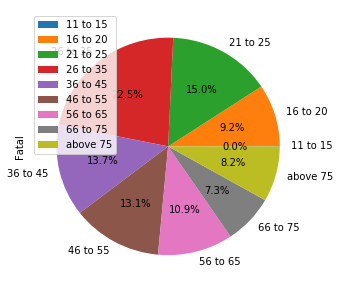

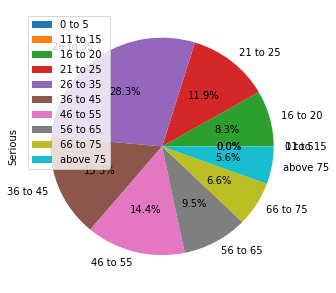

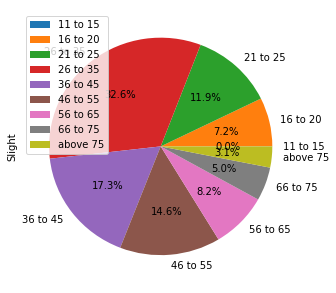

In [10]:
#Plot pie charts for each severity level

plt.figure(0)
df_age_1 = pd.DataFrame({'Fatal': array1},
                  index=['11 to 15','16 to 20','21 to 25','26 to 35','36 to 45','46 to 55','56 to 65','66 to 75','above 75'])
plot = df_age_1.plot.pie(y='Fatal', autopct='%1.1f%%',figsize=(5, 5))

plt.figure(1)
df_age_2 = pd.DataFrame({'Serious': array2},
                  index=['0 to 5','11 to 15','16 to 20','21 to 25','26 to 35','36 to 45','46 to 55','56 to 65','66 to 75','above 75'])
plot = df_age_2.plot.pie(y='Serious',autopct='%1.1f%%', figsize=(5, 5))

plt.figure(2)
df_age_3 = pd.DataFrame({'Slight': array3},
                  index=['11 to 15','16 to 20','21 to 25','26 to 35','36 to 45','46 to 55','56 to 65','66 to 75','above 75'])
plot = df_age_3.plot.pie(y='Slight',autopct='%1.1f%%', figsize=(5, 5))

plt.show()

### Relationship between accident severity and day of the week

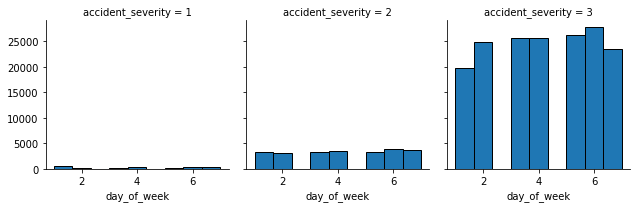

In [11]:
import seaborn as sns
import numpy as np
bins = np.linspace(df_ca.day_of_week.min(), df_ca.day_of_week.max(), 10)
g = sns.FacetGrid(df_ca, col="accident_severity", palette="Set1", col_wrap=3)
g.map(plt.hist, 'day_of_week', bins=bins, ec="k")

plt.show()

### Relationship between accident severity and sex of driver

In [12]:
#Exact column sex_of_driver and accident_severity and transfrom
df_sex = df_ca.loc[:,['sex_of_driver','accident_severity']]

print(pd.crosstab(df_sex.sex_of_driver, df_sex.accident_severity))

accident_severity     1      2      3
sex_of_driver                        
1                  1647  15142  98370
2                   577   7646  63971
3                    71   1534  10973


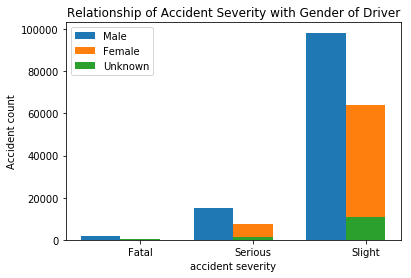

In [13]:
#Plot bar chart
N = 3
Male= (1647,15142,98370)
Female = (577,7646,63971)
Unknown = (271,1534,10973)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, Male, width, label='Male')
plt.bar(ind + width, Female, width,label='Female')
plt.bar(ind + width, Unknown, width, label='Unknown')

plt.xlabel('accident severity')
plt.ylabel('Accident count')
plt.title('Relationship of Accident Severity with Gender of Driver')

plt.xticks(ind + width, ('Fatal', 'Serious', 'Slight'))
plt.legend(loc='best')
plt.show()

### Relationship between accident severity and speed limit

In [14]:
#Get count grouped by speed_limit and accident_severity
df_speed=df_ca.groupby(['speed_limit','accident_severity']).size().reset_index()
df_speed.rename({0: 'count'}, axis=1, inplace=True)
df_speed.head()

,speed_limit,accident_severity,count
0,10,3,1
1,20,1,11
2,20,2,567
3,20,3,4201
4,30,1,559


In [15]:
#Reshape the table with pivot
pivot_df = df_speed.pivot(index='speed_limit', columns='accident_severity', values='count')
pivot_df.rename({1: 'Fatal',2:'Serious', 3:'Slight'}, axis=1, inplace=True)
pivot_df.head()

accident_severity,Fatal,Serious,Slight
speed_limit,,,
10,NaN,NaN,1.0
20,11.0,567.0,4201.0
30,559.0,12180.0,105484.0
40,262.0,2319.0,16547.0
50,169.0,1262.0,8313.0


Text(0.5,1,'Relationship between accident severity and speed limit')

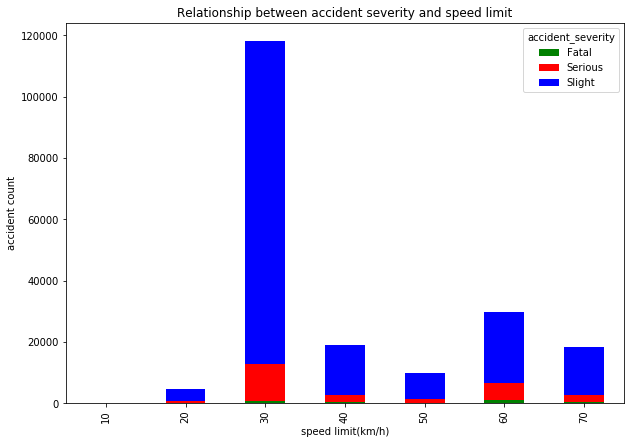

In [16]:
#Plot bar chart
pivot_df.plot.bar(stacked=True,color=['g','r','b'],figsize=(10,7))

plt.xlabel('speed limit(km/h)')
plt.ylabel('accident count')
plt.title('Relationship between accident severity and speed limit')

### Relationship between accident severity and light condition

In [17]:
#Get count grouped by light_condition and accident_severity
df_light=df_ca.groupby(['light_conditions','accident_severity']).size().reset_index()
df_light.rename({0: 'count'}, axis=1, inplace=True)
df_light['count/10']=df_light['count']/10
df_light.head()

,light_conditions,accident_severity,count,count/10
0,1,1,1357,135.7
1,1,2,16542,1654.2
2,1,3,128954,12895.4
3,4,1,379,37.9
4,4,2,5140,514.0


Text(0.5,1,'Relationship between accident severity and light conditions')

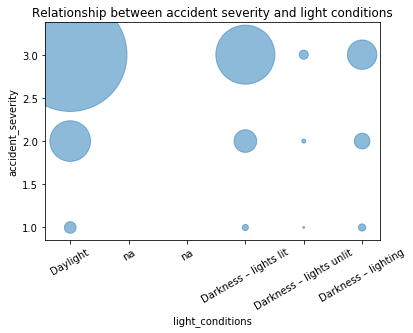

In [18]:
#Plot bubble chart
plt.scatter('light_conditions', 'accident_severity', 
             s='count/10',
             alpha=0.5,
             data=df_light)
plt.xlabel("light_conditions", size=10)
plt.ylabel("accident_severity", size=10)
plt.xticks([1,2,3,4,5,6],['Daylight','na','na','Darkness – lights lit','Darkness – lights unlit','Darkness – lighting'],rotation=30)
plt.title("Relationship between accident severity and light conditions", size=12)

### Relationship between accident severity and weather condition

In [19]:
#Get count grouped by weather condition and accident severity
df_weather=df_ca.groupby(['weather_conditions','accident_severity']).size().reset_index()
df_weather.rename({0: 'count'}, axis=1, inplace=True)
df_weather['count/10']=df_weather['count']/10
df_weather.head()

,weather_conditions,accident_severity,count,count/10
0,1,1,1871,187.1
1,1,2,19920,1992.0
2,1,3,142558,14255.8
3,2,1,244,24.4
4,2,2,2817,281.7


Text(0.5,1,'Relationship between accident severity and weather conditions')

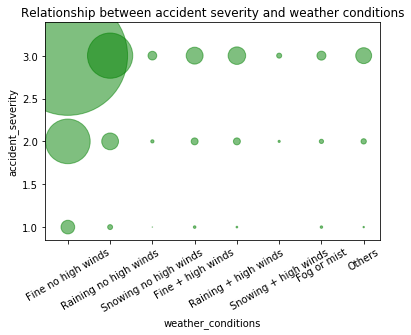

In [20]:
#Plot bubble chart
plt.scatter('weather_conditions', 'accident_severity', 
             s='count/10',color='g',
             alpha=0.5,
             data=df_weather)
plt.xlabel("weather_conditions", size=10)
plt.ylabel("accident_severity", size=10)
plt.xticks([1,2,3,4,5,6,7,8],['Fine no high winds','Raining no high winds','Snowing no high winds','Fine + high winds','Raining + high winds','Snowing + high winds','Fog or mist','Others'],rotation=30)
plt.title("Relationship between accident severity and weather conditions", size=12)

### Relationship between accident severity and road surface condition

In [21]:
#Get count groupbed by road_surface_condition and accident_severity
df_road=df_ca.groupby(['road_surface_conditions','accident_severity']).size().reset_index()
df_road.rename({0: 'count'}, axis=1, inplace=True)
df_road['count/10']=df_road['count']/10
df_road.head()

,road_surface_conditions,accident_severity,count,count/10
0,1,1,1478,147.8
1,1,2,16762,1676.2
2,1,3,124263,12426.3
3,2,1,782,78.2
4,2,2,7140,714.0


Text(0.5,1,'Relationship between accident severity and road surface conditions')

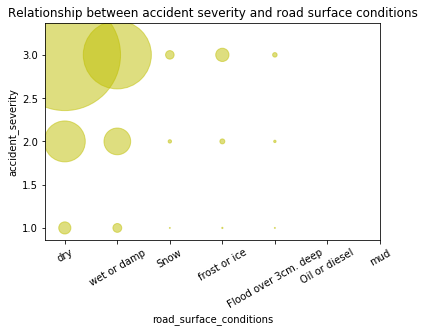

In [22]:
#Plot bubble chart
plt.scatter('road_surface_conditions', 'accident_severity', 
             s='count/10',color='y',
             alpha=0.5,
             data=df_road)
plt.xlabel("road_surface_conditions", size=10)
plt.ylabel("accident_severity", size=10)
plt.xticks([1,2,3,4,5,6,7],['dry','wet or damp','Snow','frost or ice','Flood over 3cm. deep','Oil or diesel','mud'],rotation=30)
plt.title("Relationship between accident severity and road surface conditions", size=12)


## Modeling <a name="modeling"></a>

In [23]:
#Define feature sets x
from sklearn import preprocessing
Feature=df_ca[['sex_of_driver','age_band_of_driver','day_of_week','speed_limit','light_conditions','weather_conditions','road_surface_conditions']]
X=Feature
X[0:5]

,sex_of_driver,age_band_of_driver,day_of_week,speed_limit,light_conditions,weather_conditions,road_surface_conditions
0,1,7,2,30,1,1,1
1,2,5,7,40,1,1,1
2,1,8,7,40,1,1,1
4,1,6,6,30,1,1,1
8,1,5,5,30,1,1,1


In [24]:
#Define feature sets Y
y = df_ca['accident_severity'].values
y[0:5]

array([3, 3, 3, 3, 3])

In [25]:
#Normalise data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.79444312,  0.10020677, -1.07699365, -0.66897396, -0.57895809,
        -0.33396838, -0.57500373],
       [ 0.83713169, -1.06502662,  1.48839572,  0.01273531, -0.57895809,
        -0.33396838, -0.57500373],
       [-0.79444312,  0.68282347,  1.48839572,  0.01273531, -0.57895809,
        -0.33396838, -0.57500373],
       [-0.79444312, -0.48240992,  0.97531785, -0.66897396, -0.57895809,
        -0.33396838, -0.57500373],
       [-0.79444312, -1.06502662,  0.46223997, -0.66897396, -0.57895809,
        -0.33396838, -0.57500373]])

## Classification Model

Due to the predicting value ‘accident severity’ being grouped in 3 classes – Fatal, Serious and slight, I used classification model in this project, train and test the datasets in the following models:
    
    -K Nearest Neighbor(KNN)
    -Decision Tree
    -Support Vector Machine
    -Logistic Regression

In [26]:
#Split the datasets to Train and Test data with 4:1 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (159944, 7) (159944,)
Test set: (39987, 7) (39987,)


K Nearest Neighbor(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 9
mean_acc_1 = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc_1[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc_1

array([0.79308275, 0.71125616, 0.83469628, 0.81131368, 0.85425263,
       0.8458499 , 0.85832896, 0.85697852])

In [28]:
#Best accuracy when k=7

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
Md = 6
mean_acc_2 = np.zeros((Md-1))

# loop through different value of Max Depth
for n in range(1,Md):
    
    LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    LoanTree.fit(X_train,y_train)
    PredTree=LoanTree.predict(X_test)
    mean_acc_2[n-1] = metrics.accuracy_score(y_test, PredTree)


mean_acc_2

array([0.86735689, 0.86735689, 0.86735689, 0.86735689, 0.86735689])

In [31]:
# Same accuracy for all Max depth value, we choose Md = 2 here.

Support Vector Machine

In [32]:
from sklearn import svm
from sklearn.metrics import f1_score

In [33]:
Kernel = ['rbf','poly','sigmoid']

mean_acc_3=[]

# loop through different types of kernels
for n in Kernel:
    
    lf = svm.SVC(kernel=n)
    lf.fit(X_train,y_train)
    yhat=lf.predict(X_test)
    mean_acc_3.append(f1_score(y_test, yhat, average='weighted'))

mean_acc_3

/Users/yuewang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.8062384928608916, 0.8057463251691794, 0.767198229110193]

In [34]:
#Achieve best accuracy when kernel is 'rbf'

Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score

In [36]:
c_param_range = [0.01,0.1,1,10]
mean_acc_4 = []
c_param_range = [0.01,0.1,1,10]
for i in c_param_range:
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    mean_acc_4.append(jaccard_similarity_score(y_test, yhat))
    
mean_acc_4

[0.8673568909895716,
 0.8673568909895716,
 0.8673568909895716,
 0.8673568909895716]


Among these models, Decision Tree and Logistic Regression models performed the best, both have accuracy at around 86.7357% 

## Result and Discussion <a name="rnd"></a>

We have achieved high accuracy from Decision Tree and Logistic Regression model, however the dataset that we analysed on was not perfect and there are many things we need to be careful with. For example, when we cleaned up the data, we replaced the missing or out of range value with mean for feature ‘age band of driver’, this assumption could possibly make the dataset very biased.  It also comes to my attention that among the features I chose, there are some value of features are not identified, such as ‘unknown’ value for sex of driver, the insufficiency of important information is a concern.

In addition to the above, we cannot ignore the truth that in the dataset, one accident doesn’t necessarily contribute only one row of records. In other words, those records are not completely mutually exclusive, a deeper analysis on this would be required to receive more accurate information.


## Conclusion <a name="conclusion"></a>

To conclude, I have analysed the relationship between the car accident severity with features in relation to drivers and environmental conditions. The classification models were built to predict the accident severity given the related features. 

This would be helpful for the local government to come up with some ideas regarding how to reduce the chance of car accidents and their severity. Based on the result, the pricing teams in the general insurance companies are able to calculate the reasonable premium rates which is also competitive to the market.
